<a href="https://colab.research.google.com/github/manojmanu-r/final_exam_RAVIKUMARSWAMY/blob/main/Python_final%20Part%20-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()

Saving RAVIKUMARSWAMY Manoj - data.csv to RAVIKUMARSWAMY Manoj - data.csv


In [8]:

#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [30]:
import pandas as pd

# Load dataset into a DataFrame
df = pd.read_csv("RAVIKUMARSWAMY Manoj - data.csv")

# Clean numeric columns
df['Market value as of 31 December, 2023'] = df['Market value as of 31 December, 2023'].str.replace(',', '').astype(float)
df['Number of shares'] = df['Number of shares'].str.replace(',', '').astype(float)
df['% of total portfolio'] = df['% of total portfolio'].str.replace('%', '').astype(float)

# Rename columns
df.rename(columns={
    'Market value as of 31 December, 2023': 'Market Value',
    'Number of shares': 'Shares',
    '% of total portfolio': 'Portfolio %'
}, inplace=True)

# Show a preview
df.head()


,Company,Ticker,Market Value,Shares,Portfolio %,Domain,Score
0,APPLE INC (COM),AAPL,1.743475e+11,9.055600e+08,50.19,health,17
1,BANK OF AMERICA CORP (COM),BAC,3.477613e+10,1.032852e+09,10.01,drinks,28
2,AMERICAN EXPRESS CO (COM),AXP,2.840275e+10,1.516107e+08,8.18,finance,19
3,COCA COLA CO (COM),KO,2.357200e+10,4.000000e+08,6.79,food,22
4,CHEVRON CORP (COM),CVX,1.880808e+10,1.260933e+08,5.41,tech:it,37


In [29]:
# Print data structure info
print("Dataset Info:")
df.info()

# Get basic statistical summary
print("\n Summary Statistics:")
print(df.describe())

# Display unique categories in the Domain column
print("\n  Unique Domains:")
print(df['Domain'].unique())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       41 non-null     object 
 1   Ticker        41 non-null     object 
 2   Market Value  41 non-null     float64
 3   Shares        41 non-null     float64
 4   Portfolio %   41 non-null     float64
 5   Domain        41 non-null     object 
 6   Score         41 non-null     int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 2.4+ KB

 Summary Statistics:
       Market Value        Shares  Portfolio %      Score
count  4.100000e+01  4.100000e+01    41.000000  41.000000
mean   8.472148e+09  9.231889e+07     2.439268  37.463415
std    2.778862e+10  2.197047e+08     7.999592  15.026805
min    8.852000e+06  1.111200e+04     0.000000  12.000000
25%    2.201300e+08  3.986648e+06     0.060000  22.000000
50%    1.012680e+09  1.113259e+07     0.290000  42.000000
75%    

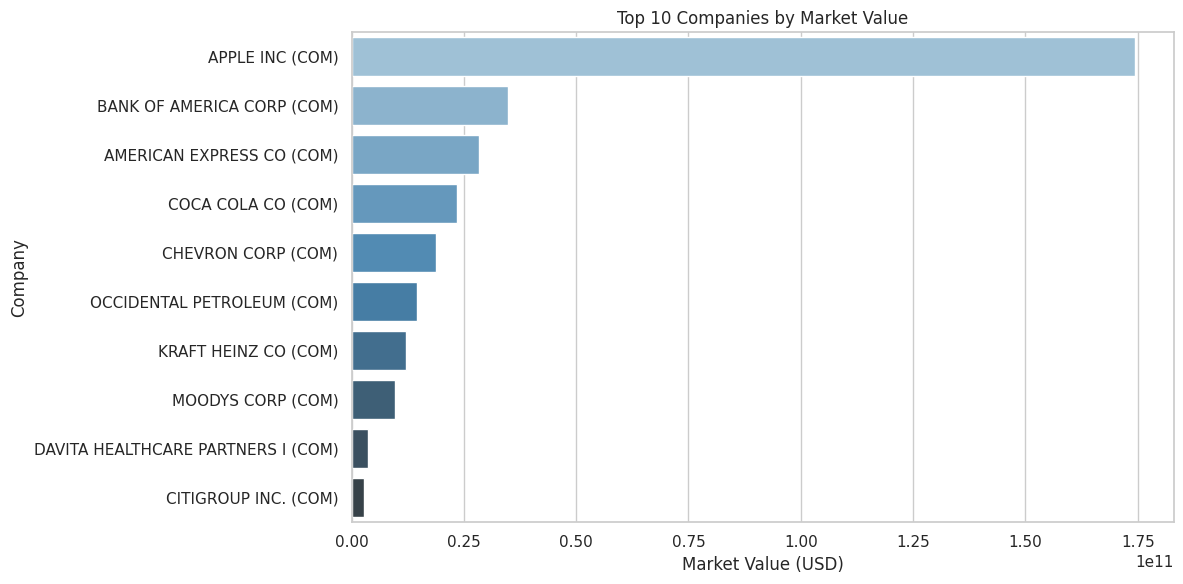

In [32]:
# Plot a horizontal bar chart with proper palette assignment
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_mv, x='Market Value', y='Company', hue='Company', palette='Blues_d', legend=False)
plt.title('Top 10 Companies by Market Value')
plt.xlabel('Market Value (USD)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()




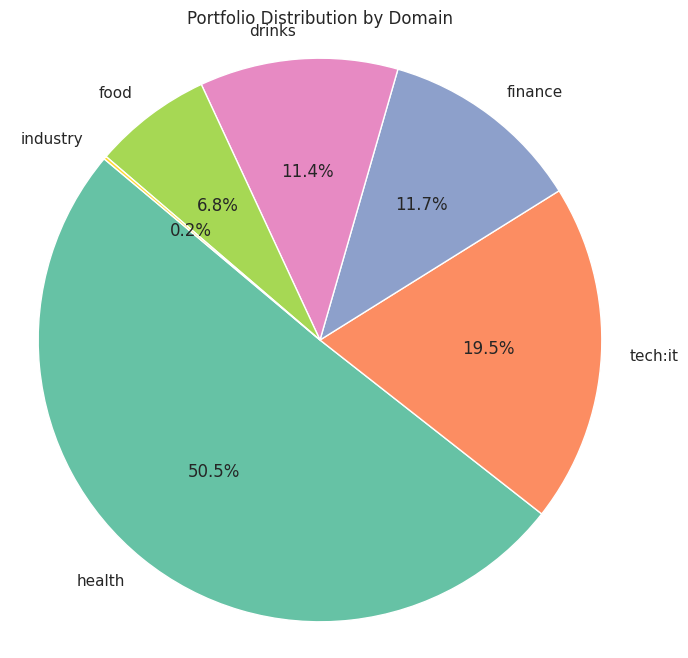

In [27]:
# Group data by Domain and sum the portfolio percentages
domain_portfolio = df.groupby('Domain')['Portfolio %'].sum().sort_values(ascending=False)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(domain_portfolio, labels=domain_portfolio.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Portfolio Distribution by Domain')
plt.axis('equal')
plt.show()

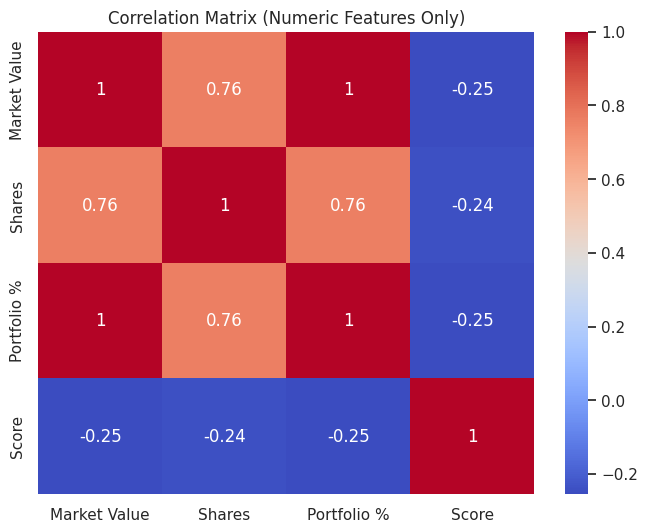

In [26]:
# Select only numeric columns to avoid errors
numeric_df = df.select_dtypes(include='number')

# Plot a heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()



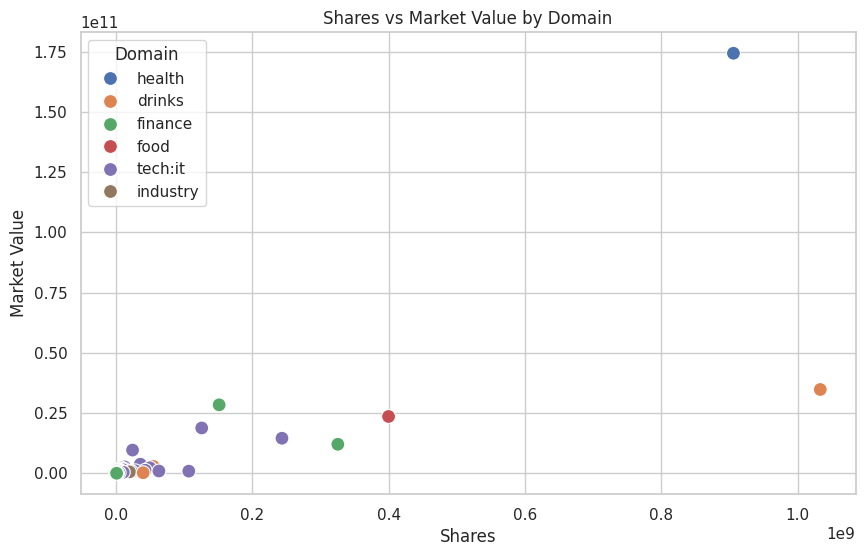

In [25]:
# Scatter plot colored by Domain
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Shares', y='Market Value', hue='Domain', s=100)
plt.title("Shares vs Market Value by Domain")
plt.show()

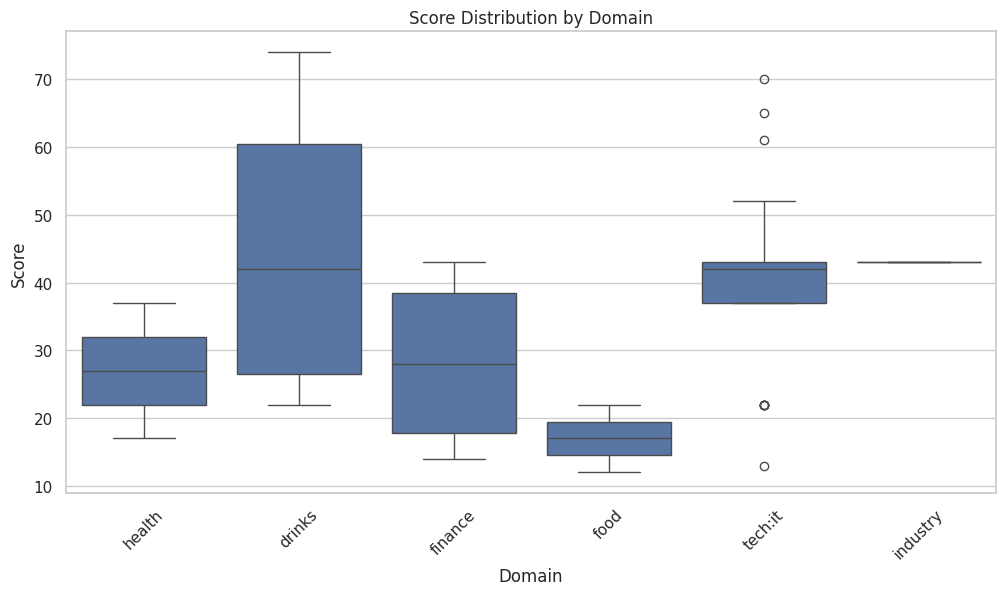

In [24]:
# Create a boxplot grouped by Domain
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Domain', y='Score')
plt.title("Score Distribution by Domain")
plt.xticks(rotation=45)
plt.show()
